# Machine Learning (CMP3751M/CMP9772M) - Assessment 02

Through the following notebook, you will be analysing a dataset and fitting a classification model to this dataset.

The assessment is structured as follows:
- [Dataset description](#Dataset-description)
- [Loading the dataset](#Loading-the-dataset)
- [Simple classification model](#Simple-classification-model)
    - [Creating a training and testing set](#Creating-a-training-and-testing-set)
    - [Training a classifier](#Training-a-classifier)
- [Improved evaluation strategy](#Improved-evaluation-strategy)
- [Different models and parameter search](#Different-models-and-parameter-search)
- [Ensembles](#Ensembles)
- [Final model evaluation](#Final-model-evaluation)
- [References](#References)

**Notes:**
- The (%) noted above are out of 100; this will be scaled down to **maximum of 60 marks** for the assessment **(or maximum of 50 marks for CMP9772M)** .
- Any discussion not supported by your implementation will not be awarded marks.
- **Do not modify** and code provided as a **TESTING CELL**.
- Make sure to **fix all the random seeds** in any parts of your solution, so it can be reproduced exactly.
- The notebook, as provided, runs without errors (without solving the assessment). Make sure that the solution, or the partial solution, you hand in, also **runs without errors** on the data provided. If you have a partial solution causing errors which you would like to show, please include it as a comment.
- Take care to include references to any external sources used. Check the [References](#References) section, the below cell, and the exambles through the assessment text for examples of how to do this.


In [283]:
# Remember to reference your sources! Check the bottom of the file, and examples used in the text of the assessment,
# for including references to papers and software in your textual answers

# Also add a reference in your solution cell before defining a class/function/method, eg.:

# This code is a modified and extended version of [2]
# OR
# This code is a modified and extended version of https://stackoverflow.com/q/522563/884412
##############
## THE CODE ##
##############

## Dataset description

The the assessment will be done on the dataset containing only numerical features describing the physical and chemical properties of the Li-ion battery, which can be classified on the basis of their crystal system [1]. (The dataset for this assessment has been adapted from the full dataset which can be found [here](https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries), shared in the public domain by Divyansh Agrawal).

Each sample corresponds to the properties of a battery, and consists of following features:

| Feature Name      | Value | Description |
| :---------------- | :----- | ----------- |
| `Formation Energy`       | `float`: eV | Formation energy of the material. |
| `E Above Hull` | `float`: eV | Energy of decomposition of material into most stable ones. |
| `Band Gap` | `float`: eV | Band gap. |
| `Nsites` | `int`: count | Number of atoms in the unit cell of the crystal. |
| `Density` | `float`: gm/cc | The density of bulk crystalline materials. |
| `Volume` | `float` | The unit cell volume of the material. |

The goal for the assessment is to predict whether the crystal system of the battery is _monoclinic_, _orthorhombic_ or _triclinic_, which provides a classification for each sample:

| Class      | Value | Description |
| :---------------- | :----- | ----------- |
| `Crystal System`  | `string`: class designation | Class of the crystal system. |


## Loading the dataset

The dataset is given in _batteries.csv_ file provided on Blackboard. **Load the dataset into two [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)s.**: 
- The variable `X` should be a 2D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing all the samples and their features from the dataset, one sample per row. 
- The variable `y` should be a 1D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing the ground truth (class) as given in the `'Crystal System'` field of the _.csv_ file.
- _Note_: The class in the `'Crystal System'` column is given as a string. Make sure you encode the class as an integer number in your ground truth `y`.
- _Note_: You should make sure that your code for loading the dataset is guided by the information about the dataset, and the dataset description you provide as your answer.

**Describe the dataset**. Provide a basic description of the dataset. How many samples are there in the dataset? How many distinct classes? What types of features describe the samples in the dataset? Are there any missing values in the dataset? (Make sure these are properly handled). 
- _Note_: Make sure all your answers are supported by your implementation. Answers not supported by your implementation will not score any marks.

Provide your code to _load the dataset_ and the code that will allow you to _describe the dataset_ in the **SOLUTION CELL**. Provide your description of the dataset in the **ANSWER CELL**. A correct solution should result in no errors when running the **TESTING CELL** provided.

**SOLUTION CELL**

Samples = 339

Formation Energy    1
E Above Hull        0
Band Gap            2
Nsites              0
Density             2
Volume              0
Crystal System      0
dtype: int64

Number of 0 values in Band Gap column: 16

Samples = 334
Crystal System
0    137
1    126
2     71
Name: count, dtype: int64
Probability of each class:
Crystal System
0    0.410180
1    0.377246
2    0.212575
Name: proportion, dtype: float64



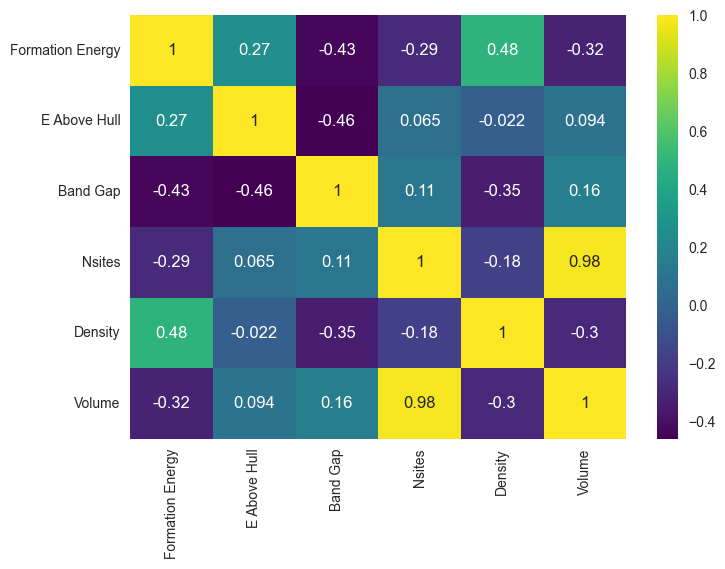

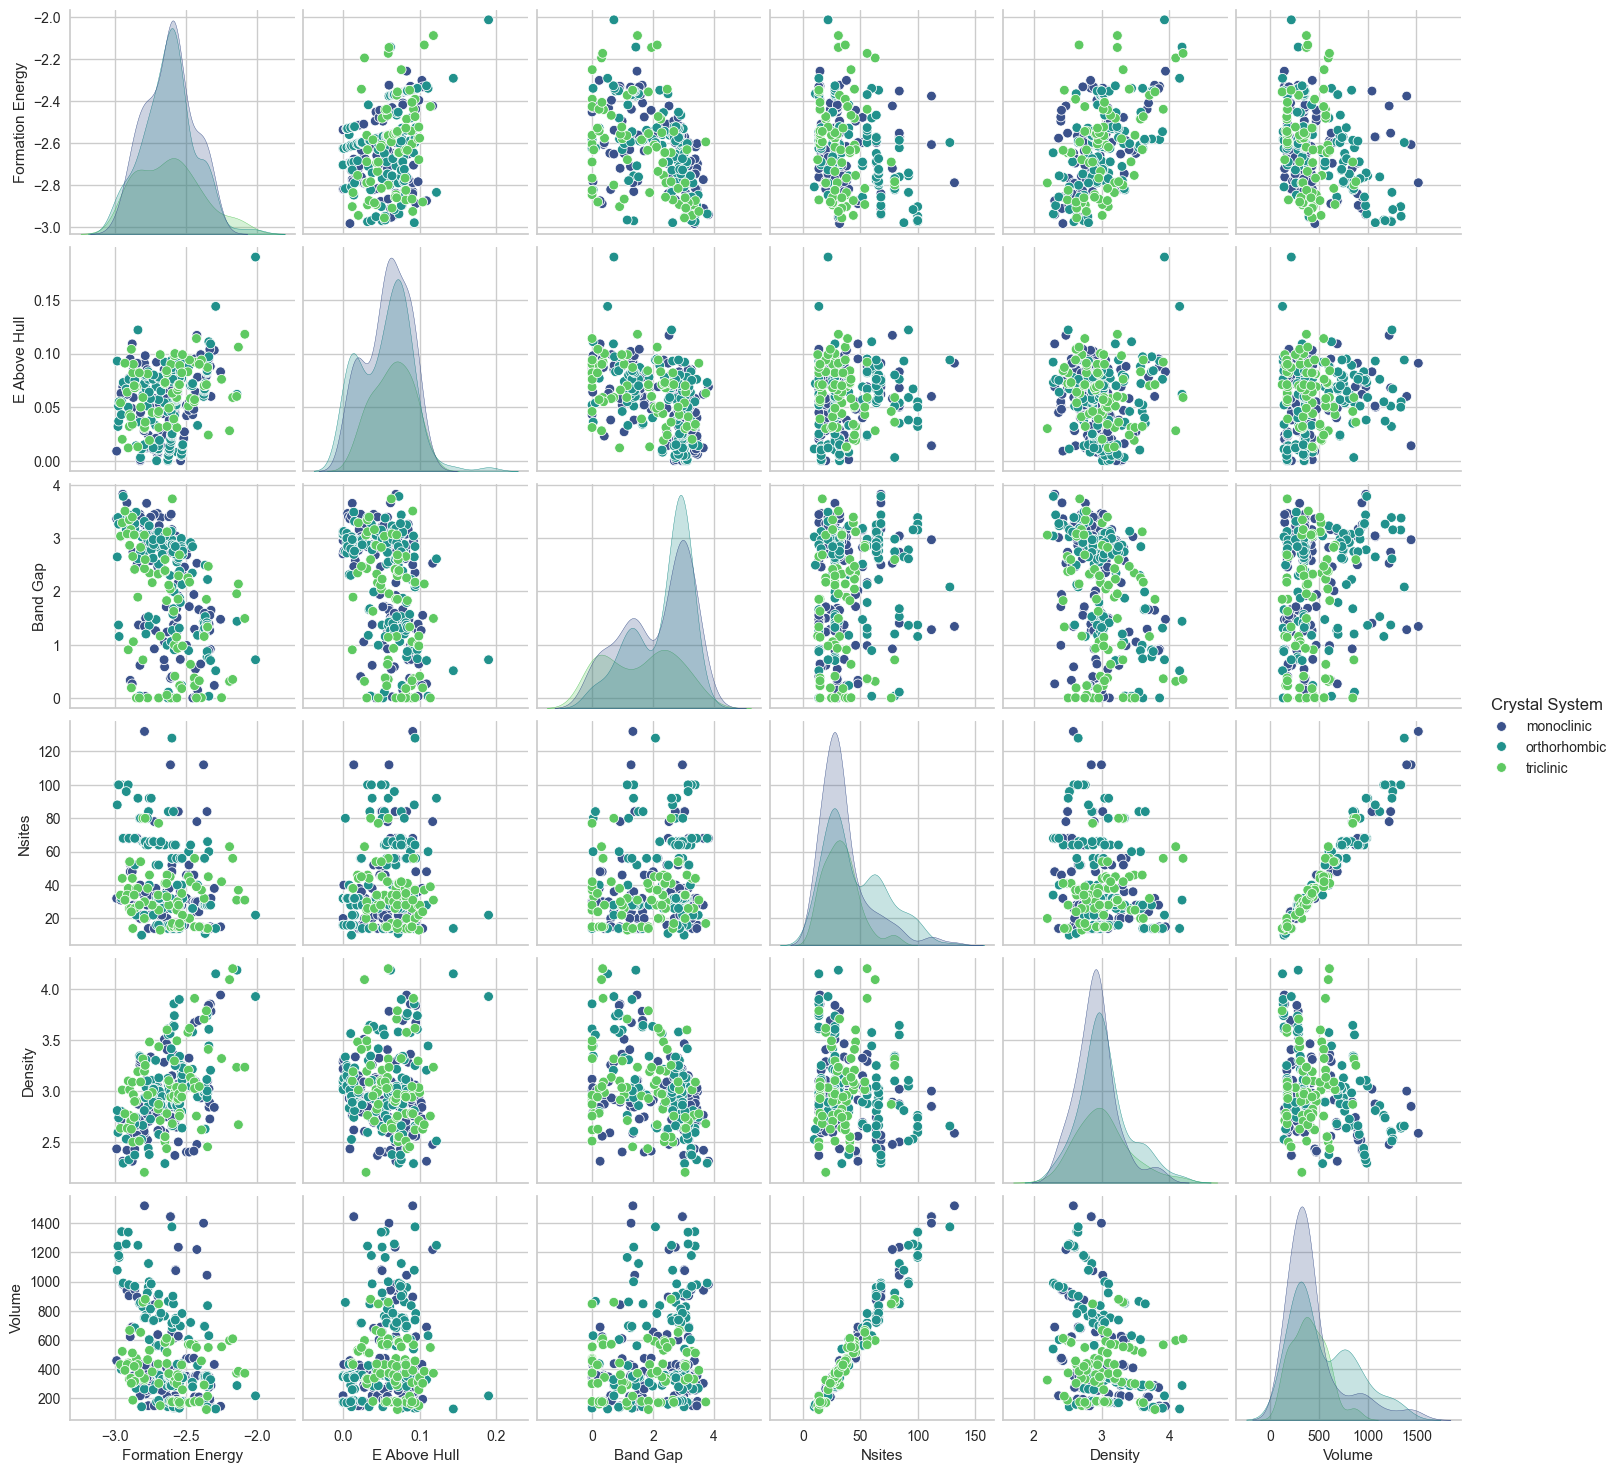

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_state = 42

df = pd.read_csv('batteries.csv')
print(f'Samples = {len(df)}\n')
#Counts number of missing values in each feature and drops the rows with missing values.
print(f'{df.isna().sum()}\n')
df = df.dropna(how='any')

#Separate X variable to show correlation matrix
df_dropped = df.drop('Crystal System', axis = 1)

#How many 0 values are in the Band Gap column
print(f'Number of 0 values in Band Gap column: {len(df_dropped[df_dropped["Band Gap"] == 0])}\n')

#Replace 0 values with the second lowest value in the column, I assumed that the 0's
#were  due to a rounding error.
second_lowest_value = df_dropped['Band Gap'].drop_duplicates().nsmallest(2).iloc[1]
df_dropped['Band Gap'].replace(0, second_lowest_value, inplace=True)

#Converts the dataframe to a numpy array.
y = df['Crystal System'].to_numpy()

#Map to encode the targets as integers instead of strings.
cat_map = {'monoclinic':0,
           'orthorhombic':1,
           'triclinic':2}

#Replaces the crystal system with the encoded values.
y = df['Crystal System'].replace(cat_map)

print(f'Samples = {len(df)}')
print(f'{y.value_counts()}')
print(f'Probability of each class:\n{y.value_counts(normalize=True)}\n')

#Plot a correlation matrix
corr = df_dropped.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
sns.pairplot(df, hue='Crystal System', palette='viridis')
plt.show()

df_dropped = df_dropped.drop('Volume', axis=1)


    
X = df_dropped.to_numpy()

**TESTING CELL**

In [285]:
assert(len(X.shape) == 2)
assert(len(y.shape) == 1)
assert(X.shape[0] == y.shape[0])

**ANSWER CELL**

There are 339 samples in the dataset.
There are 3 distinct target classes, monoclinic, orthorhombic, triclinic.
The 6 features that describe the sample are Formation Energy, E Above Hull, Band Gap, Nsites, Density and Volume, they are all numerical in data type.
There are 5 missing/null values, 1 in Formation Energy, 2 in Band Gap and 2 in Density.
These rows were dropped using the dropna() to give a total of 334 sampples, other methods like imputing data by taking the mean or median value could have been used. A correlation matrix was created and it is shown than Volume and Nsites have a 0.98 correlation, so one of these columns should be dropped to avoid redundancy as they provide similar information about the target variable and could possibly lead to overfitting. Also, high correlation between features can lead to multicollinearity which can make it difficult in isolating the individual effect of each feature on the predicted class. The 'Volume' column was dropped instead of 'Nsites' as the accuracy was ~68% compared to ~50% when the 'Nsites' column was dropped.

Furthermore, some values in the Band Gap feature are 0, possibly due to a rounding error. The band gap is defined as the minimum change in energy required to move the electron from its bound state to its free state in order to participate in conduction [3], thus a battery cannot have a 0 band gap otherwise the electron would be freely moving throughout the material, discharging randomly and not participating in conduction. These 0 values will be replaced with the lowest non-zero value 0.005.

## Simple classification model

To get the feel for the dataset, the first step will be to build train a simple classification model for this dataset. Do this in two steps detailed below:
1. Set aside some data for training and for testing.
2. Train a simple classifier on this data.

### Creating a training and testing set

**Set aside 20\% of the data for testing, and use the remaining 80\% to train your model.** Make sure to fix any random seeds if you use any functions or methods relying on those, so your experiments are _fully repeatable_. Initialise the following variables:
- `X_train` should contain the features corresponding to your training data.
- `y_train` should contain the ground truth of your training data.
- `X_test` should contain the features corresponding to your testing data.
- `y_train` should contain the ground truth associated to your testing data.

_Note:_ No additional marks will be rewarded for implementing an advanced data splitting strategy on this task. The purpose of this task is to start working with the dataset by applying a simple approach; you will have the chance to implement more complex evaluation pipelines in a later task.

Provide your implementation in the **SOLUTION CELL (a)** below. A correct solution should result in no errors when running the **TESTING CELL** provided.

### Training a classifier

**Train a simple classifier,** (of your choosing) **with fixed parameters** on the dataset, and **calculate accuracy on the test set**.
- Define a function `model_accuracy(y_test, y_pred)` to compare the ground truth given in `y_test` to predictions given in `y_pred` and calculate accuracy.
- **Store the model** in the variable named `model`. For the model, you may chose any classifier with which you are familiar (e.g. K Nearest Neighbours), or implement your own classifier. Make sure you **train your model** using the _training data_ only (`X_train`, `y_train`).
- Use the model to **predict the classes of the data** in the testing set (`X_test`), and calculate the accuracy by comparing the predictions with the ground truth for the testing set (`y_test`). **Store the predictions** in a variable called `y_test`.

_Note:_ Do not implement an advanced strategy to chose the parameters of your classifier here, as that will be a topic of a latter question.

_Note:_ If you implement your own classifier, make sure you implement it as a _class_ following the _sklearn_ standard for classifiers (i.e. make sure it implements the `fit(X, y)` method to train the model, and `predict(X)` method to use the trained model to predict the classes of provided samples.


**Discuss the advantages and shortcomings** of the evaluation strategy implemented through this task. Discuss both the data split used for evaluation and the choice of metric. Taking into account the information you know about the dataset, what kind of accuracy scores can you expect on this dataset from a good and bad performing model? Based on the information you have so far, comment on the performance of the model you have trained on the provided dataset.

Provide your implementation in the **SOLUTION CELL (b)** below. The **TESTING CELL** below should run without errors and will print the prediction of your model for the first sample in the test set, and the accuracy as calculated by your `model_accuracy` function. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL (a)**

In [286]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, shuffle = True, random_state = random_state)


**TESTING CELL**

In [287]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1] == X_test.shape[1])

**SOLUTION CELL (b)**

In [288]:
def model_accuracy(y_test, y_pred):
    acc = 0
    acc = np.sum(y_test == y_pred)/len(y_test)
    return acc

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X_train, y_train)

y_predictions = model.predict(X_test)
accuracy = model_accuracy(y_test, y_predictions)
print(f'Accuracy = {accuracy}')

Accuracy = 0.6865671641791045


**TESTING CELL**

In [289]:
print(model.predict(X_test[0].reshape(1,-1)))
print(model_accuracy(y_test, y_predictions))

[2]
0.6865671641791045


**ANSWER CELL**

The evaluation strategy consisted of only measuring the accuracy of the model, this measures the proportion of correction predictions out of all the predictions made which is easy to interpret but can be misinforming of the model's actual performance if the dataset has an imbalanced number of classes, it does not provide class-specific information. When classes are imbalanced the classifier could choose the majority class and still receive high accuracy, in those cases other metrics should be used such as precision, recall or balanced accuracy.

The data splitting strategy, is using a training and a test set, which helps simulate the model's performance on unseen data, providing some estimate of its generalisation. However, there are only 334 samples in the whole dataset, so a relatively large portion of data is used as a test set. This could lead to a high variance in the accuracy score, as the model is trained on a small amount of data, and the accuracy score could change significantly if the test set is changed. A better strategy would be to use cross-validation, which would allow the model to be trained on all the data, and the accuracy score would be more stable as it would be averaged over multiple iterations of the cross-validation. Moreover, I did not remove any outliers from the dataset, which could lead to a decrease in the model's performance as the model could be overfitting to the outliers when spiltting the data.

The current accuracy of the model is 0.68, which is not very high, but it is not very low either. The dataset is small, so a simple model such as KNN could perform well on this dataset. The dataset is also imbalanced, with the monoclinic class having 2 times more samples than the triclinic class, so the model could be predicting the monoclinic class more often and still receive a high accuracy score. A good accuracy score would be ~0.75, and a bad accuracy score would be <0.5.


## Improved evaluation strategy

After discussing the shortcomings of the simple evaluation strategy used in the previous task, you now have a chance to **propose a better evaluation strategy.** Make sure your chosen strategy **uses all the samples in the dataset** to report the result.
- Implement a function `evaluate_model(model, X, y)` to implement your proposed evaluation strategy. The function should evaluate the model given in `model` on the dataset given by `X` with ground truth given by `y`. Note that the function should be passed the _whole of the dataset_ (see **TESTING CELL** below) and should take care of any data splitting internally.
- If desired, you may add additional arguments to this function, as long as they have default values and the function runs correctly when called using those default values.
- The function should return no values, but instead print the results of the evaluation in a human-readable format.
- Include at least one summative metric (providing a single number, e.g. accuracy) and per-class metric (e.g. precision). You are encouraged to select more than one metric of each type.

This function will be used to provide a better evaluation of the simple model with fixed parameters used in the previous task.

**Discuss your chosen evaluation strategy**, including both the data split and the evaluation metrics. Which data splitting strategy did you chose and why? Which metrics did you chose, and why? Briefly explain the chosen data splitting strategy. What additional information can your additional metrics provide beyond accuracy?

Provide your implementation of this function in the **SOLUTION CELL**. You may also include any additional evaluation calls you want to include in this code cell. The **TESTING CELL** will perform a basic evaluation of your `model` using the `evaluate_model` function implemented for this task. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [290]:
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, LeaveOneOut




def evaluate_model(model, X, y):
    print('Evaluating model...')
    ################################
    #### ADD YOUR SOLUTION HERE ####
    ################################
    #Stratified k- Fold Cross validation
    model_name = type(model).__name__
    if model_name == 'BaggingClassifier':
        model_name = model.estimator_.__class__.__name__
        print(f'{model_name} bagged results:')
    else:
        print(f'{model_name} results:')
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    bal_acc = cross_val_score(model, X, y, cv=skf, scoring='balanced_accuracy')
    acc = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    
    precision = cross_val_score(model, X, y, cv=skf, scoring='precision_macro')
    recall = cross_val_score(model, X, y, cv=skf, scoring='recall_macro')
    print(f'Balanced Accuracy: {bal_acc.mean()}')
    print(f'Accuracy: {acc.mean()}')
    print(f'Precision: {precision.mean()}')
    print(f'Recall: {recall.mean()}')

    


**TESTING CELL**

In [291]:
evaluate_model(model, X, y)

Evaluating model...
KNeighborsClassifier results:
Balanced Accuracy: 0.5253143399810066
Accuracy: 0.5657168701944821
Precision: 0.5824395146166177
Recall: 0.5253143399810066


**ANSWER CELL**

Due to class imbalances, stratified K-fold cross validation was chosen. This method splits the data into k folds, and each fold is used as a test set once, and the rest of the data is used as a training set. Stratified K-fold cross validation ensures that the proportion of classes in each fold is the same as the proportion of classes in the whole dataset, this is important as the dataset is imbalanced.This method allows the model to be trained on all the data, and the accuracy score is more stable as it is averaged over multiple iterations of the cross-validation. Although the performance metrics have decreased slightly compared to the simple evaluation strategy, the mertics are more reliable and representative of the model's performance, rather than overfitting a certain class.

The metrics chosen were accuracy, balanced accuracy, precision and recall.

TODO: add more info about the metrics

## Different models and parameter search

Now that you have a [better evaluation strategy](#Improved-evaluation-strategy) implemented, it is time to try out different models, and try out different parameter combinations for these models.

**Fit at least three different (types of) machine learning models** to the provided dataset. (_Note:_ Make sure at least 2 out of your 3 chosen types have different model parameters which can be adjusted). **Try different parameters for all of your models** (which have parameters). Use a single summative metric of your choice to choose between the different types of models, and the models with different parameters. Finally, **choose thee different models, one of each type** and assign them to variables `model_1`, `model_2` and `model_3`.

**Discuss your choice of models, and your procedure to adjust the model parameters**. Discuss how you reached the decision about the best model amongst the models of the same type (which metric was selected, and why). Also discuss any shortcomings of your approach and how (and if) you could improve on this. After evaluating these models on the dataset, **discuss and compare their performance on the provided data.**

Implement your solution in the **SOLUTION CELL**. The **TESTING CELL** will evaluate the three best models selected by you, using your evaluation strategy. Discuss your choices in the **ANSWER CELL**.

**SOLUTION CELL**

In [292]:
################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######
#### Code  adapted from [2] ####
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

model_1 = RandomForestClassifier(random_state=random_state)

#Finding the best parameters for the random forest model
#The cv type is StratifiedKFold as per the sklearn documentation [4].
grid_search_model_1 = GridSearchCV(model_1, param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_model_1.fit(X, y)
best_params_model_1 = grid_search_model_1.best_params_
print(f'Random Forest best params:{best_params_model_1}')
model_1 = RandomForestClassifier(**best_params_model_1, random_state=random_state)
model_1.fit(X, y)


#range of n neighbors to test
n_neighbors = list(range(1, 31))
param_grid_knn = {
    'n_neighbors': n_neighbors,
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
#Finding the best parameters for the KNN model
model_2 = KNeighborsClassifier()
grid_search_model_2 = GridSearchCV(model_2, param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_model_2.fit(X, y)
best_params_model_2 = grid_search_model_2.best_params_
print(f'KNN Best Params: {best_params_model_2}')
model_2 = KNeighborsClassifier(**best_params_model_2)



param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
#Finding the best parameters for the SVC model
#'poly' was removed from the kernel parameter because it was taking too long to run.
model_3 = SVC(random_state=random_state)
grid_search_model_3 = GridSearchCV(model_3,param_grid_svc, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_model_3.fit(X, y)
best_params_model_3 = grid_search_model_3.best_params_
print(f'SVC Best Params: {best_params_model_3}')
model_3 = SVC(**best_params_model_3, random_state=random_state)
model_3.fit(X, y)


Random Forest best params:{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
KNN Best Params: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
SVC Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


SVC(C=10, gamma='auto', random_state=42)

**TESTING CELL**

In [293]:
evaluate_model(model_1, X, y)
print()
evaluate_model(model_2, X, y)
print()
evaluate_model(model_3, X, y)

Evaluating model...
RandomForestClassifier results:
Balanced Accuracy: 0.5763342830009496
Accuracy: 0.5954771596562641
Precision: 0.6194207143461193
Recall: 0.5763342830009496

Evaluating model...
KNeighborsClassifier results:
Balanced Accuracy: 0.679698548365215
Accuracy: 0.6796019900497512
Precision: 0.6884174595094136
Recall: 0.679698548365215

Evaluating model...
SVC results:
Balanced Accuracy: 0.6226365486365486
Accuracy: 0.6376300316598824
Precision: 0.6331852045357793
Recall: 0.6226365486365486


**ANSWER CELL**

TODO

## Ensembles

Sometimes, combining different weak classification models can improve the overall performance of the model. **Implement bagging** for each of your three classification models (`model_1`, `model_2`, `model_3`) [from the previous task](#Different-models-and-parameter-search). Store your models performing bagging over your based models calculated in the previous task in variables called `bagged_1`, `bagged_2` and `bagged_3`. Provide your implementation, running any additional evaluation needed, in the **SOLUTION CELL**

The **TESTING CELL** will evaluate your 3 bagged models using your own evaluation procedure. It will also make a voting ensemble consisting of your three base models (`model_1`, `model_2`, `model_3`) and another one made of your bagged models (`bagged_1`, `bagged_2` and `bagged_3`), and evaluate these three voting ensembles.

**Discuss** the effect on bagging on your base models. Discuss how you chose the bagging parameters, and justify your choice. Discuss the effect using the voting ensemble had on your model performance. Compare the effect of a voting ensemble on the ensemble models to the effect on the base models. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [294]:
################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######
#### Code  adapted from [2] ####
from sklearn.ensemble import BaggingClassifier
bagged_1 = BaggingClassifier(model_1, n_estimators=10, random_state=random_state)
bagged_1.fit(X, y)
bagged_2 = BaggingClassifier(model_2, n_estimators=10, random_state=random_state)
bagged_2.fit(X, y)
bagged_3 = BaggingClassifier(model_3, n_estimators=10, random_state=random_state)
bagged_3.fit(X, y)


BaggingClassifier(estimator=SVC(C=10, gamma='auto', random_state=42),
                  random_state=42)

**TESTING CELL**

In [295]:
from sklearn.ensemble import VotingClassifier

eclf  = VotingClassifier(estimators=[('CLF1', model_1), ('CLF2', model_2), ('CLF3', model_3)], voting='hard')
ebclf  = VotingClassifier(estimators=[('BCLF1', bagged_1), ('BCLF2', bagged_2), ('BCLF3', bagged_3)], voting='hard')

evaluate_model(bagged_1, X, y)
print()
evaluate_model(bagged_2, X, y)
print()
evaluate_model(bagged_3, X, y)
print()
evaluate_model(eclf, X, y)
print()
evaluate_model(ebclf, X, y)

Evaluating model...
RandomForestClassifier bagged results:
Balanced Accuracy: 0.5313995387328719
Accuracy: 0.5715513342379014
Precision: 0.6018869307375054
Recall: 0.5313995387328719

Evaluating model...
KNeighborsClassifier bagged results:
Balanced Accuracy: 0.6369268755935422
Accuracy: 0.6437810945273632
Precision: 0.6559302169812237
Recall: 0.6369268755935422

Evaluating model...
SVC bagged results:
Balanced Accuracy: 0.5974942341609009
Accuracy: 0.6226594301221167
Precision: 0.6257794614366329
Recall: 0.5974942341609009

Evaluating model...
VotingClassifier results:
Balanced Accuracy: 0.6697056030389363
Accuracy: 0.6856625961103573
Precision: 0.6935129404069933
Recall: 0.6697056030389363

Evaluating model...
VotingClassifier results:
Balanced Accuracy: 0.6295967982634649
Accuracy: 0.6587064676616914
Precision: 0.6705918435106577
Recall: 0.6295967982634649


**ANSWER CELL**

_Write your answer here._

## Final model evaluation

Based on all the experiments performed for this assessment, **choose a single best model, evaluate it** with [your evaluation procedure](#Improved-evaluation-strategy) and also **display the confusion matrix**. **Discuss the performance achieved by this model**.

**You should attempt this cell even if you have not successfully trained all the models required in this assessment, and comment on the best model which _you_ have obtanied.**

Implement your solution in the **SOLUTION CELL** below. Add your discussion to the **ANSWER CELL** below.

**SOLUTION CELL**

Confusion Matrix for KNN:


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

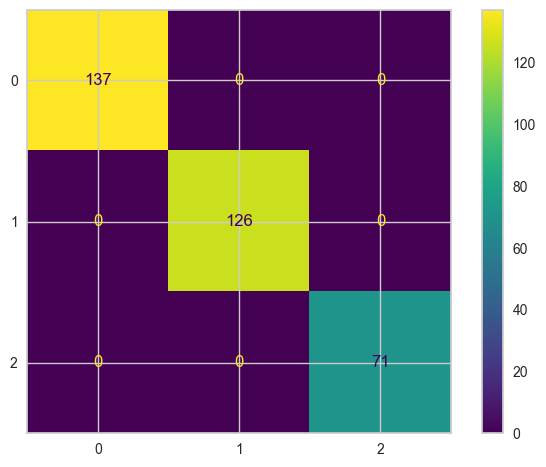

In [303]:
################################
#### ADD YOUR SOLUTION HERE ####
################################

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


**ANSWER CELL**

_Write your answer here._

## References

[1] Divyansh Agrawal: Crystal System Properties for Li-ion batteries (dataset) https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries/discussion (accessed 28/08/2023)

[2] Mateen Ulhaq, Mike Hordecki (code) https://stackoverflow.com/a/522578/884412 (accessed 24/08/2023)

[3] C.B.Honsberg and S.G.Bowden, “Photovoltaics Education Website,” https://www.pveducation.org/pvcdrom/pn-junctions/band-gap, 2019 (accessed 27/12/2023)

[4] Pedregosa et al., "Scikit-learn: Machine Learning in Python", https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV, 2024, (accessed 27/12/2023)